2025-06-24 10:25:40.935079: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-24 10:25:40.974546: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 10:25:41.238445: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 10:25:41.357785: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750728341.489825   22504 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750728341.51

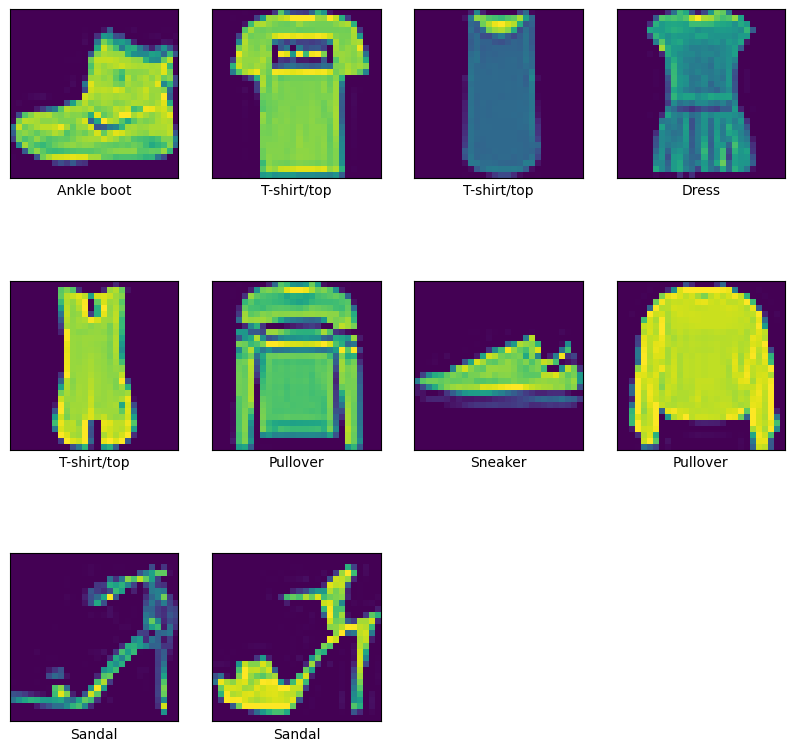

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()

f_image_train, f_image_test = f_image_train/255.0, f_image_test/255.0

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(f_image_train[i])
    plt.xlabel(class_names[f_label_train[i]])
plt.show()
    

In [3]:
#CNN
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),
                                 activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),
                                 activation='relu'))

#ANN
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(f_image_train, f_label_train, epochs=10, batch_size=10)
model.summary()
model.save('fashion_mnist.h5')


/home/so/intro/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.7628 - loss: 0.6408
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8867 - loss: 0.3070
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8986 - loss: 0.2715
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9112 - loss: 0.2391
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9213 - loss: 0.2137
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9244 - loss: 0.2015
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9294 - loss: 0.1902
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9345 - loss: 0.1761
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9363 - loss: 0.1678
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9404 - loss: 0.1580


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,776 (1.80 MB)

 Trainable params: 157,258 (614.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 314,518 (1.20 MB)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2


model = tf.keras.models.load_model('./fashion_mnist.h5')
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()

f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0

num = 10
predict = model.predict(f_image_test[:num])
print(f_label_test[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))


2025-06-24 10:41:59.137609: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-24 10:41:59.139081: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 10:41:59.148086: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 10:41:59.172679: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750729319.214188   26418 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750729319.22

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
[9 2 1 1 6 1 4 6 5 7]
 * Prediction,  [9 2 1 1 6 1 4 6 5 7]
